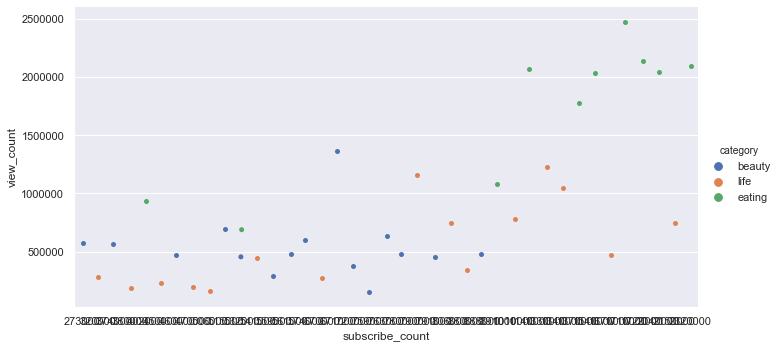

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("파뿌리.csv",encoding="utf-8")


mean_df = df.groupby([df["subscribe_count"]]).mean()
mean_df.head(15)

mean_df.index



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

sub_cat_view = df.groupby(["subscribe_count","category"],as_index=False)["view_count"].mean()

sub_cat_view

sns.catplot(data=sub_cat_view,x="subscribe_count",y="view_count",hue="category",aspect=2)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
train_data = df.drop(["view_count","category"],axis=1)
target_data = df["view_count"]

In [4]:
train_data.head(15)

,thumbnail,title,likes_count,dislikes_count,upload_date,video_length,subscribe_count
0,0.0,1,160000,9000,16,19,1370000
1,0.5,1,150000,7500,16,12,1710000
2,0.0,3,100000,9400,16,11,1140000
3,0.0,1,82000,4300,16,11,1370000
4,0.0,3,110000,5900,16,9,1370000
5,0.5,1,84000,8100,13,16,402000
6,0.0,5,96000,3000,15,12,2040000
7,0.0,1,99000,5200,16,11,1140000
8,0.0,1,72000,6200,16,11,1140000
9,0.5,1,57000,3800,16,12,1710000


In [5]:
x_train,x_test,y_train,y_test = train_test_split(train_data,target_data)

In [6]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100).fit(x_train,y_train)

In [7]:
print("traing set accuracy : ",forest.score(x_train,y_train))
print("test set accuracy : ",forest.score(x_test,y_test))


traing set accuracy :  0.9647854651059834
test set accuracy :  0.6637497177715366


In [8]:
beauty_data = df[df["category"] == "beauty"]
train_data_beauty = beauty_data.drop(["view_count","category"],axis=1)
test_data_beauty = beauty_data["view_count"]

x_train_beauty, x_test_beauty,y_train_beauty,y_test_beauty = train_test_split(train_data_beauty,test_data_beauty)

In [9]:
eating_data = df[df["category"] == "eating"]
train_data_eating = eating_data.drop(["view_count","category"],axis=1)
test_data_eating = eating_data["view_count"]

x_train_eating,x_test_eating,y_train_eating,y_test_eating = train_test_split(train_data_eating,test_data_eating)


In [10]:
life_data = df[df["category"] == "life"]
train_data_life = life_data.drop(["view_count","category"],axis=1)
test_data_life = life_data["view_count"]

x_train_life,x_test_life,y_train_life,y_test_life = train_test_split(train_data_life,test_data_life)


In [11]:
forest_beauty = RandomForestRegressor().fit(x_train_beauty,y_train_beauty)
forest_eating = RandomForestRegressor().fit(x_train_eating,y_train_eating)
forest_life = RandomForestRegressor().fit(x_train_life,y_train_life)

print("Beauty : ")
print("traing set accuracy : ",forest_beauty.score(x_train_beauty,y_train_beauty))
print("test set accuracy : ",forest_beauty.score(x_test_beauty,y_test_beauty))

print("Eating : ")
print("traing set accuracy : ",forest_eating.score(x_train_eating,y_train_eating))
print("test set accuracy : ",forest_eating.score(x_test_eating,y_test_eating))

print("Life : ")
print("traing set accuracy : ",forest_life.score(x_train_life,y_train_life))
print("test set accuracy : ",forest_life.score(x_test_life,y_test_life))


Beauty : 
traing set accuracy :  0.9562716205496047
test set accuracy :  0.461131109344048
Eating : 
traing set accuracy :  0.9886839833907988
test set accuracy :  0.4910182579366582
Life : 
traing set accuracy :  0.9604498117226588
test set accuracy :  0.6547586301154362


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
new_data = pd.read_csv("all_data(슛뚜,온도).csv")
new_x_test = new_data.drop(["category","view_count"],axis=1)
new_y_test = new_data["view_count"]

In [16]:
print("new data set accuracy : ", forest_life.score(new_x_test,new_y_test))

new data set accuracy :  0.8875910017990862
